In [20]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style="whitegrid")

In [21]:
#Load all datasets
df = pd.read_json(
    "../data/training-set/chatbot-arena-conversations.jsonl.gz",
    lines=True,
    compression="gzip"
)
df.head(5)
prompt_embeddings = np.load(
    "../data/training-set/chatbot-arena-prompts-embeddings.npy"
)

response_a_embeddings = np.load(
    "../data/training-set/chatbot-arena-model_a_response-embeddings.npy"
)

response_b_embeddings = np.load(
    "../data/training-set/chatbot-arena-model_b_response-embeddings.npy"
)

topic_and_hardness = pd.read_csv("../data/training-set/topic_hardness_embedding_cluster_labels.csv")

In [22]:
# Function to extract a single digit using regex
def extract_digit(value):
    match = re.search(r"\d", str(value))  # Search for the first digit
    return int(match.group()) if match else None  # Return digit or None

# Apply the regex extraction to all relevant columns
for col in ["score_value_1", "score_value_2", "score_value_3"]:
    topic_and_hardness[col] = topic_and_hardness[col].apply(extract_digit)

# Calculate the combined hardness score (ignoring NaNs)
topic_and_hardness["combined_hardness_score"] = (
    topic_and_hardness[["score_value_1", "score_value_2", "score_value_3"]]
    .mean(axis=1, skipna=True)  # Calculate mean while ignoring NaN values
)
topic_and_hardness.head(2)

,Unnamed: 0,question_id,prompt,openai_scores_raw_choices_nested,topic_modeling_1,score_reason_1,score_value_1,topic_modeling_2,score_reason_2,score_value_2,topic_modeling_3,score_reason_3,score_value_3,prompt_objective,objective_term,prompt_topic,topic_term,Agglo_Cluster,HDBSCAN_Cluster,combined_hardness_score
0,0,58210e39b3fd4441a2bd4a518bb44c2d,What is the difference between OpenCL and CUDA?,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",technical comparison,This prompt requires the AI to accurately comp...,9.0,software comparison,This prompt assesses the AI's factual accuracy...,8.0,"comparison, technology",This prompt requires the AI to demonstrate kno...,9.0,comparing,comparison,programming,software,1,169,8.666667
1,1,2564acd09e3942fd97657d05282d4389,Why did my parent not invite me to their wedding?,"[{'finish_reason': 'stop', 'index': 0, 'logpro...","reasoning, emotion",This prompt requires the AI to understand huma...,9.0,"emotions, relationships",This prompt involves understanding complex hum...,8.0,"reasoning, emotional",This prompt challenges the AI to infer motives...,8.0,comparing,relation,Social,emotion,6,-1,8.333333


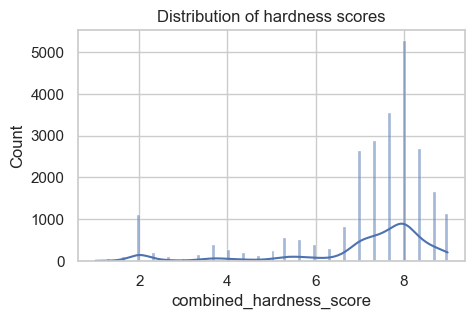

In [23]:
plt.figure(figsize = (5,3))
sns.histplot(data = topic_and_hardness["combined_hardness_score"], kde = True)
plt.title("Distribution of hardness scores")
plt.show()

In [24]:
hardness_stats = topic_and_hardness["combined_hardness_score"].describe()
hardness_stats

count    25256.000000
mean         7.119721
std          1.714614
min          1.000000
25%          7.000000
50%          7.666667
75%          8.000000
max          9.000000
Name: combined_hardness_score, dtype: float64

In [25]:
# Split the topics in each cell and flatten the list
all_topics = topic_and_hardness["topic_modeling_1"].str.split(',').explode().str.strip()

# Get the unique topics and their count
unique_topics = all_topics.unique().tolist()
unique_count = len(unique_topics)

# Print the unique topics and their total count
print(f"Unique topics: {unique_topics}")
print(f"Total unique topics: {unique_count}")


Unique topics: ['technical comparison', 'reasoning', 'emotion', 'camera comparison', 'chatbot arena', 'time query', 'counting sequences', 'emoji selection', 'neural network parallelization', 'arithmetic calculation', 'mathematical operations', 'future prediction', 'politeness enhancement', 'religious technology', 'language popularity', 'science fiction', 'geometry problem-solving', 'explanation', 'quantum mechanics', 'programming', 'mathematics', 'string manipulation', 'ai research', 'mathematical computation', 'storytelling', 'creativity', 'ai advancement', 'fibonacci sequence', 'training', 'memory', 'water resources', 'obfuscation', 'encryption', 'programming integration', 'historical knowledge', 'future trend prediction', 'mechanical procedure', 'art', 'history knowledge', 'prime numbers', 'categorization', 'exclusivity', 'knowledge assessment', 'factual knowledge', 'chatbot evaluation', 'list creation', 'natural language processing', 'code generation', 'ai fine-tuning', 'physics ex

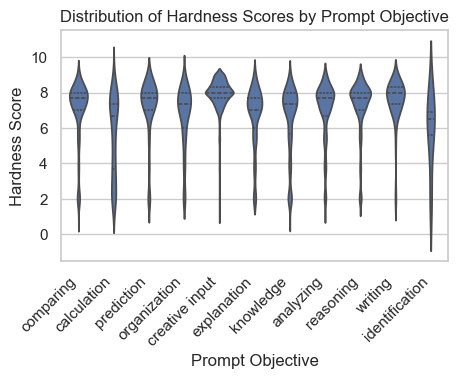

In [54]:
# Create the violin plot
plt.figure(figsize=(5, 3)) 
sns.violinplot(
    data=topic_and_hardness, 
    x="prompt_objective", 
    y="combined_hardness_score", 
    inner="quartile"  
)

plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Hardness Scores by Prompt Objective")
plt.xlabel("Prompt Objective")
plt.ylabel("Hardness Score")
plt.show()


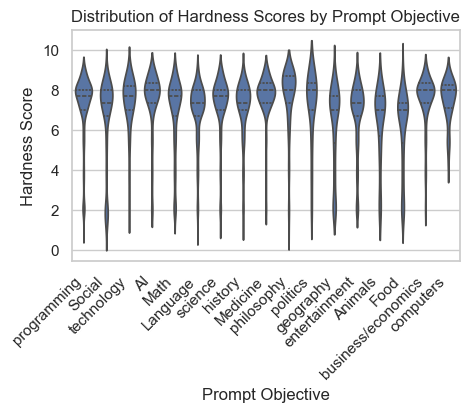

In [55]:
# Create violin plot
plt.figure(figsize=(5, 3)) 
sns.violinplot(
    data=topic_and_hardness, 
    x="prompt_topic", 
    y="combined_hardness_score", 
    inner="quartile"  
)

plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Hardness Scores by Prompt Objective")
plt.xlabel("Prompt Objective")
plt.ylabel("Hardness Score")
plt.show()


In [28]:
agglo_cluster = topic_and_hardness.groupby(by="Agglo_Cluster")["combined_hardness_score"].mean()
agglo_cluster



Agglo_Cluster
0     6.675587
1     7.654060
2     7.506462
3     6.866030
4     7.756944
5     7.360910
6     6.227818
7     7.311132
8     7.611862
9     6.722846
10    7.119354
11    7.790035
12    7.487619
13    7.617574
14    6.409631
15    6.880165
16    7.424548
17    7.483452
18    7.367684
19    7.351852
20    6.857424
21    6.666667
22    7.457364
23    7.243934
24    7.171654
25    7.560137
26    4.938197
27    7.478824
28    7.428298
29    7.220915
30    7.211686
31    7.130150
32    6.239756
33    7.464624
34    6.674039
35    7.586667
36    6.281463
37    7.497922
38    7.538462
39    7.341625
Name: combined_hardness_score, dtype: float64

In [37]:
hdbscan_cluster = topic_and_hardness.groupby(by="HDBSCAN_Cluster")["combined_hardness_score"].mean()
hdbscan_cluster

HDBSCAN_Cluster
-1      7.180396
 0      7.639344
 1      7.904762
 2      7.155556
 3      7.425926
          ...   
 238    7.052632
 239    7.168022
 240    7.141026
 241    7.282828
 242    7.703252
Name: combined_hardness_score, Length: 244, dtype: float64